In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\Murali krishna\\Downloads\\archive (1)\\train.csv")

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.rename(columns={'talk_time' :'longest time after a single charge'},inplace=True)

In [6]:
df.shape

(2000, 21)

In [7]:
df.dtypes

battery_power                           int64
blue                                    int64
clock_speed                           float64
dual_sim                                int64
fc                                      int64
four_g                                  int64
int_memory                              int64
m_dep                                 float64
mobile_wt                               int64
n_cores                                 int64
pc                                      int64
px_height                               int64
px_width                                int64
ram                                     int64
sc_h                                    int64
sc_w                                    int64
longest time after a single charge      int64
three_g                                 int64
touch_screen                            int64
wifi                                    int64
price_range                             int64
dtype: object

### Checking null values 

In [8]:
df.isnull().sum()

battery_power                         0
blue                                  0
clock_speed                           0
dual_sim                              0
fc                                    0
four_g                                0
int_memory                            0
m_dep                                 0
mobile_wt                             0
n_cores                               0
pc                                    0
px_height                             0
px_width                              0
ram                                   0
sc_h                                  0
sc_w                                  0
longest time after a single charge    0
three_g                               0
touch_screen                          0
wifi                                  0
price_range                           0
dtype: int64

### checking duplicates

In [9]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,longest time after a single charge,three_g,touch_screen,wifi,price_range


In [10]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,longest time after a single charge,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


### Removing Outliers

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [12]:
lower_range,upper_range=remove_outlier(df['battery_power'])
df["battery_power"]=np.where(df['battery_power']>upper_range,upper_range,df['battery_power'])
df["battery_power"]=np.where(df['battery_power']<lower_range,lower_range,df['battery_power'])

In [13]:
lower_range,upper_range=remove_outlier(df['blue'])
df["blue"]=np.where(df['blue']>upper_range,upper_range,df['blue'])
df["blue"]=np.where(df['blue']<lower_range,lower_range,df['blue'])

In [14]:
lower_range,upper_range=remove_outlier(df['clock_speed'])
df["clock_speed"]=np.where(df['clock_speed']>upper_range,upper_range,df['clock_speed'])
df["clock_speed"]=np.where(df['clock_speed']<lower_range,lower_range,df['clock_speed'])

In [15]:
lower_range,upper_range=remove_outlier(df['dual_sim'])
df["dual_sim"]=np.where(df['dual_sim']>upper_range,upper_range,df['dual_sim'])
df["dual_sim"]=np.where(df['dual_sim']<lower_range,lower_range,df['dual_sim'])

In [16]:
lower_range,upper_range=remove_outlier(df['fc'])
df["fc"]=np.where(df['fc']>upper_range,upper_range,df['fc'])
df["fc"]=np.where(df['fc']<lower_range,lower_range,df['fc'])

In [17]:
lower_range,upper_range=remove_outlier(df['four_g'])
df["four_g"]=np.where(df['four_g']>upper_range,upper_range,df['four_g'])
df["four_g"]=np.where(df['four_g']<lower_range,lower_range,df['four_g'])

In [18]:
lower_range,upper_range=remove_outlier(df['int_memory'])
df["int_memory"]=np.where(df['int_memory']>upper_range,upper_range,df['int_memory'])
df["int_memory"]=np.where(df['int_memory']<lower_range,lower_range,df['int_memory'])

In [19]:
lower_range,upper_range=remove_outlier(df['m_dep'])
df["m_dep"]=np.where(df['m_dep']>upper_range,upper_range,df['m_dep'])
df["m_dep"]=np.where(df['m_dep']<lower_range,lower_range,df['m_dep'])

In [20]:
lower_range,upper_range=remove_outlier(df['mobile_wt'])
df["mobile_wt"]=np.where(df['mobile_wt']>upper_range,upper_range,df['mobile_wt'])
df["mobile_wt"]=np.where(df['mobile_wt']<lower_range,lower_range,df['mobile_wt'])

In [21]:
lower_range,upper_range=remove_outlier(df['n_cores'])
df["n_cores"]=np.where(df['n_cores']>upper_range,upper_range,df['n_cores'])
df["n_cores"]=np.where(df['n_cores']<lower_range,lower_range,df['n_cores'])

In [22]:
lower_range,upper_range=remove_outlier(df['pc'])
df["pc"]=np.where(df['pc']>upper_range,upper_range,df['pc'])
df["pc"]=np.where(df['pc']<lower_range,lower_range,df['pc'])

In [23]:
lower_range,upper_range=remove_outlier(df['px_height'])
df["px_height"]=np.where(df['px_height']>upper_range,upper_range,df['px_height'])
df["px_height"]=np.where(df['px_height']<lower_range,lower_range,df['px_height'])

In [24]:
lower_range,upper_range=remove_outlier(df['px_width'])
df["px_width"]=np.where(df['px_width']>upper_range,upper_range,df['px_width'])
df["px_width"]=np.where(df['px_width']<lower_range,lower_range,df['px_width'])

In [25]:
lower_range,upper_range=remove_outlier(df['ram'])
df["ram"]=np.where(df['ram']>upper_range,upper_range,df['ram'])
df["ram"]=np.where(df['ram']<lower_range,lower_range,df['ram'])

In [26]:
lower_range,upper_range=remove_outlier(df['sc_h'])
df["sc_h"]=np.where(df['sc_h']>upper_range,upper_range,df['sc_h'])
df["sc_h"]=np.where(df['sc_h']<lower_range,lower_range,df['sc_h'])

In [27]:
lower_range,upper_range=remove_outlier(df['sc_w'])
df["sc_w"]=np.where(df['sc_w']>upper_range,upper_range,df['sc_w'])
df["sc_w"]=np.where(df['sc_w']<lower_range,lower_range,df['sc_w'])

In [28]:
lower_range,upper_range=remove_outlier(df['longest time after a single charge'])
df["longest time after a single charge"]=np.where(df['longest time after a single charge']>upper_range,upper_range,df['longest time after a single charge'])
df["longest time after a single charge"]=np.where(df['longest time after a single charge']<lower_range,lower_range,df['longest time after a single charge'])

In [29]:
lower_range,upper_range=remove_outlier(df['three_g'])
df["three_g"]=np.where(df['three_g']>upper_range,upper_range,df['three_g'])
df["three_g"]=np.where(df['three_g']<lower_range,lower_range,df['three_g'])

In [30]:
lower_range,upper_range=remove_outlier(df['touch_screen'])
df["touch_screen"]=np.where(df['touch_screen']>upper_range,upper_range,df['touch_screen'])
df["touch_screen"]=np.where(df['touch_screen']<lower_range,lower_range,df['touch_screen'])

In [31]:
lower_range,upper_range=remove_outlier(df['wifi'])
df["wifi"]=np.where(df['wifi']>upper_range,upper_range,df['wifi'])
df["wifi"]=np.where(df['wifi']<lower_range,lower_range,df['wifi'])

In [32]:
lower_range,upper_range=remove_outlier(df['price_range'])
df["price_range"]=np.where(df['price_range']>upper_range,upper_range,df['price_range'])
df["price_range"]=np.where(df['price_range']<lower_range,lower_range,df['price_range'])

### Data Visualization

<AxesSubplot:xlabel='price_range', ylabel='count'>

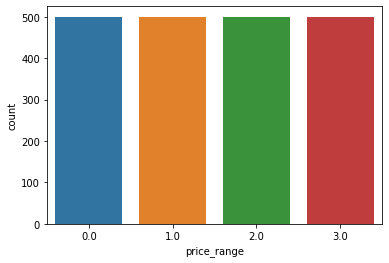

In [33]:
sns.countplot(x='price_range',data=df)

#### Here all the three classes are equally distributed,so the dataset is balanced

<AxesSubplot:xlabel='wifi', ylabel='count'>

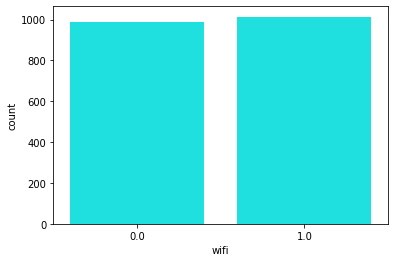

In [236]:
sns.countplot(x='wifi',data=df,color='cyan')

In [233]:
df['wifi'].value_counts()

1.0    1014
0.0     986
Name: wifi, dtype: int64

#### 986 mobiles didnt have internet connection means they must be keypad phones without wifi and they cost less compared to smart phones

<AxesSubplot:xlabel='touch_screen', ylabel='count'>

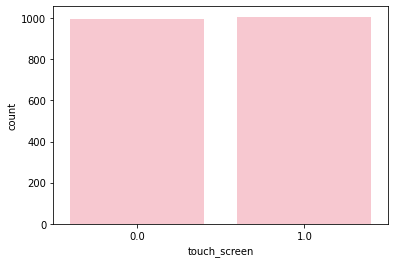

In [238]:
sns.countplot(x='touch_screen',data=df,color='pink')

In [235]:
df['touch_screen'].value_counts()

1.0    1006
0.0     994
Name: touch_screen, dtype: int64

#### 1006 are smart phones and 994 are keypad phones from the above it is sure that 986 didnt have wifi.Now 994 phones are keypad ones.
#### so 994-986=8 phones are keypad phones with wifi like jio phone etc

In [36]:
df['three_g'].value_counts()

1.0    2000
Name: three_g, dtype: int64

#### Every mobile supports 3G connection

In [37]:
df['longest time after a single charge'].value_counts()

7.0     124
4.0     123
16.0    116
15.0    115
19.0    113
6.0     111
10.0    105
8.0     104
11.0    103
20.0    102
14.0    101
13.0    100
18.0    100
9.0     100
2.0      99
12.0     99
17.0     98
3.0      94
5.0      93
Name: longest time after a single charge, dtype: int64

#### Above values 7,4,... represents in how many hours the battery will take time to drain once it is fully charged.Usually keypad phones batteries 
#### last long time,so upon adding all values >=10 we get 1071 this means not only keypad but also some smart phones last their batteries long

<AxesSubplot:xlabel='four_g', ylabel='count'>

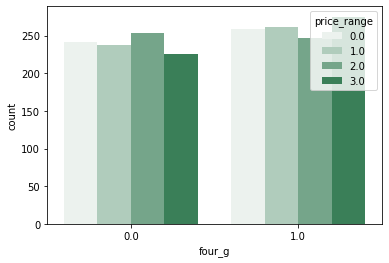

In [248]:
sns.countplot(x='four_g',data=df,hue='price_range',color='seagreen')

#### Mobiles which doesnt support bluetooth and belong to price_range of class-3 are less in number which is opposite in mobiles which support bluetooth

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

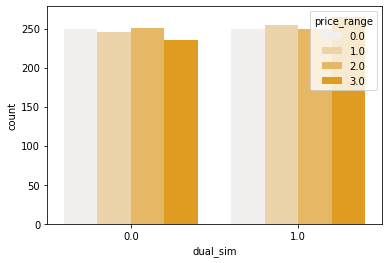

In [247]:
sns.countplot(x='dual_sim',data=df,hue='price_range',color='orange')

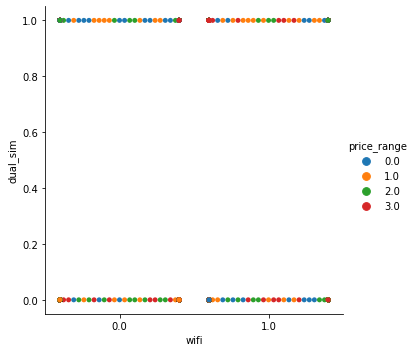

In [244]:
sns.catplot(x="wifi", y="dual_sim",kind = "swarm", data=df,hue='price_range')

#### most of the mobiles which doesnt support wifi and belonged to class-2 in price_range are single sim phones and most of phones belongs to class -2,3 in price_range with wifi are dual sim

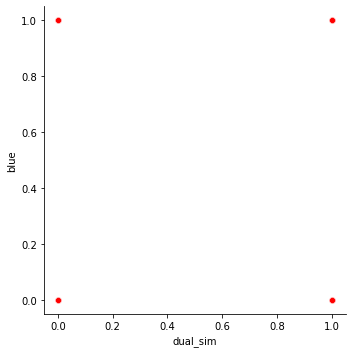

In [243]:
sns.relplot(df["dual_sim"],df["blue"],color='red')

<AxesSubplot:xlabel='sc_w', ylabel='count'>

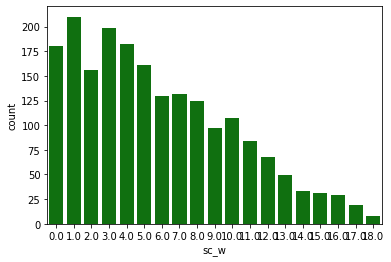

In [41]:
sns.countplot(x="sc_w",data=df,color='green')

#### Here there are mobiles with screen width 0cm,it is not possible so there are 175 missing values in this data

### Replacing missing values

In [42]:
df['sc_w']=df['sc_w'].replace(to_replace=0, value=np.nan)
df['sc_w']=df['sc_w'].astype(float)
mean=df['sc_w'].mean()
df['sc_w'].replace(np.nan,mean,inplace=True)
mean

6.337362637362637

<AxesSubplot:xlabel='sc_w', ylabel='count'>

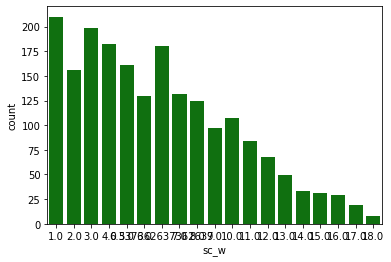

In [255]:
sns.countplot(x="sc_w",data=df,color='green')

#### most of the mobiles have screen width of 1cm with price_range of class 3

<AxesSubplot:xlabel='sc_h', ylabel='count'>

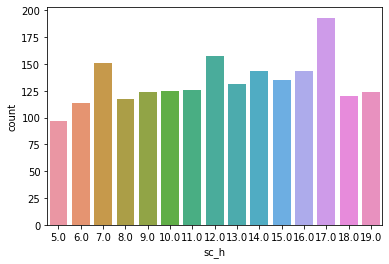

In [254]:
sns.countplot(x="sc_h",data=df)

#### Smart phones have large screen heigth compared to keypad ones,as we seen above that smart phone count is high.From the 
#### above graph we can say that larger screen heigth phones are more in count

<AxesSubplot:xlabel='longest time after a single charge', ylabel='count'>

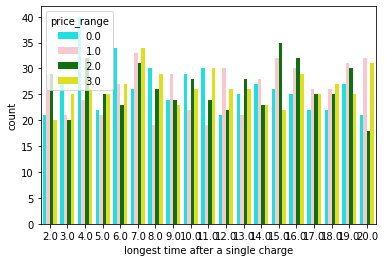

In [252]:
sns.countplot(x="longest time after a single charge",data=df,hue='price_range',color='cyan',palette=['cyan','pink','green','yellow'])

#### Most of the phones will last 2 or 4 hours once they are fully charged and they belong to price_range of class-0

<AxesSubplot:xlabel='pc', ylabel='count'>

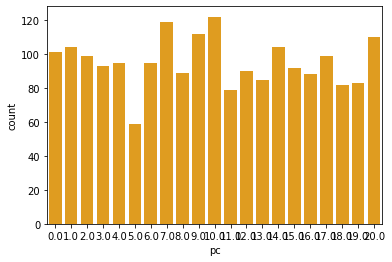

In [46]:
sns.countplot(x="pc",data=df,color='orange')

#### Primary Camera pixels cant be zero.so there are 100 missing values in the dataset.

#### Replacing missing values

In [47]:
df['pc']=df['pc'].replace(to_replace=0, value=np.nan)
df['pc']=df['pc'].astype(float)
mean=df['pc'].mean()
df['pc'].replace(np.nan,mean,inplace=True)
mean

10.44391785150079

<AxesSubplot:xlabel='pc', ylabel='count'>

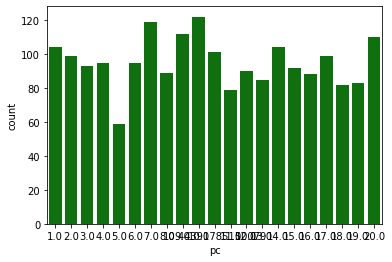

In [48]:
sns.countplot(x="pc",data=df,color='green')

<AxesSubplot:xlabel='fc', ylabel='count'>

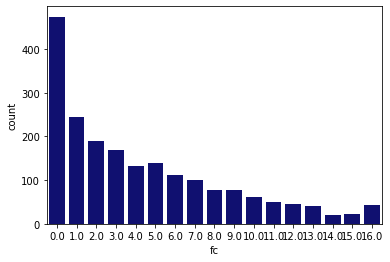

In [49]:
sns.countplot(x="fc",data=df,color='navy')

### Replacing missing values in fc(Front Camera pixels) column

In [50]:
df['fc']=df['fc'].replace(to_replace=0, value=np.nan)
df['fc']=df['fc'].astype(float)
mean=df['fc'].mean()
df['fc'].replace(np.nan,mean,inplace=True)
mean

5.62778505897772

<AxesSubplot:xlabel='fc', ylabel='count'>

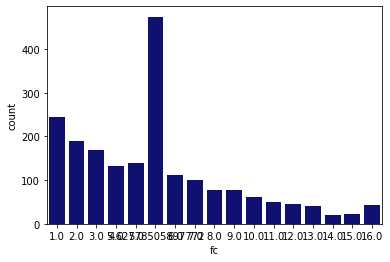

In [51]:
sns.countplot(x="fc",data=df,color='navy')

#### Most of the phones are having Front Camera pixels of 50M

In [52]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### LogisticRegression

In [54]:
log= LogisticRegression(dual=False,fit_intercept=True,penalty='l2', solver='newton-cg')

In [55]:
log.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [56]:
log.score(x_train,y_train)

0.98

In [57]:
log.score(x_test,y_test)

0.9566666666666667

### KNN

In [58]:
knn=KNeighborsClassifier()

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [60]:
knn.score(x_train,y_train)

0.9557142857142857

In [61]:
knn.score(x_test,y_test)

0.92

### Naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [63]:
nb.fit(x_train,y_train)

GaussianNB()

In [64]:
nb.score(x_train,y_train)

0.8235714285714286

In [65]:
nb.score(x_test,y_test)

0.78

### Decision tree

In [66]:
dt=DecisionTreeClassifier(random_state=1,max_depth=4)

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [68]:
dt.score(x_train,y_train)

0.8371428571428572

In [69]:
dt.score(x_test,y_test)

0.8266666666666667

In [70]:
rf=RandomForestClassifier(random_state=1)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [72]:
rf.score(x_train,y_train)

1.0

In [73]:
rf.score(x_test,y_test)

0.8633333333333333

###  Using KFold Cross Validation to overcome Overfitting

In [74]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=11)
score=cross_val_score(rf,x,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.87912088 0.87362637 0.90659341 0.84065934 0.87912088 0.91208791
 0.88461538 0.9010989  0.84615385 0.87845304 0.87845304]
Average Cross Validation score :0.8799984545840899


### SVM

In [75]:
svc=svm.SVC(probability=True)

In [76]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [77]:
svc.score(x_train,y_train)

0.9514285714285714

In [78]:
svc.score(x_test,y_test)

0.9433333333333334

### AdaBoost Claasifier

In [79]:
ada=AdaBoostClassifier(random_state=1)

In [80]:
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [81]:
ada.score(x_train,y_train)

0.6664285714285715

In [82]:
ada.score(x_test,y_test)

0.675

### GradientBoost Classifier

In [83]:
gb=GradientBoostingClassifier(learning_rate=0.01,n_estimators=11,random_state=1,max_features=50,max_depth=4,max_leaf_nodes=9)

In [84]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=50,
                           max_leaf_nodes=9, n_estimators=11, random_state=1)

In [85]:
gb.score(x_train,y_train)

0.8707142857142857

In [86]:
gb.score(x_test,y_test)

0.8216666666666667

### XGBoost Classifier

In [87]:
xg=xgb.XGBClassifier(random_state=1)

In [88]:
xg.fit(x_train,y_train)

[00:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [89]:
xg.score(x_train,y_train)

1.0

In [90]:
xg.score(x_test,y_test)

0.8983333333333333

### Bagging Classifier

In [91]:
bg=BaggingClassifier(n_estimators=700,max_samples=13,max_features=15,random_state=1)

In [92]:
bg.fit(x_train,y_train)

BaggingClassifier(max_features=15, max_samples=13, n_estimators=700,
                  random_state=1)

In [93]:
bg.score(x_train,y_train)

0.7707142857142857

In [94]:
bg.score(x_test,y_test)

0.7516666666666667

### Grid SearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

### logisticRegression using GridSearchCV

In [96]:
param_grid_log={'penalty':['l2','l1','elasticnet'],
    'dual':[False,True],
    'fit_intercept':[True,False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

In [97]:
grid_search_log=GridSearchCV(estimator=log,param_grid=param_grid_log,
                        cv=3,return_train_score=True)

In [98]:
grid_search_log.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'dual': [False, True], 'fit_intercept': [True, False],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True)

In [99]:
grid_search_log.best_params_

{'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [100]:
grid_search_log.score(x_train,y_train)

0.98

In [101]:
grid_search_log.score(x_test,y_test)

0.9566666666666667

### KNN using Grid SearchCV

In [102]:
param_grid_knn={'n_neighbors':[13,21,38,50]
    }

In [103]:
grid_search_knn=GridSearchCV(estimator=knn,param_grid=param_grid_knn,
                        cv=3,return_train_score=True)

In [104]:
grid_search_knn.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [13, 21, 38, 50]},
             return_train_score=True)

In [105]:
grid_search_knn.best_params_

{'n_neighbors': 21}

In [106]:
grid_search_knn.score(x_train,y_train)

0.9442857142857143

In [107]:
grid_search_knn.score(x_test,y_test)

0.925

### Naive_bayes using Grid SearchCv

In [108]:
param_grid_nb={'priors':[2,3,5]}

In [109]:
grid_search_nb=GridSearchCV(estimator=nb,param_grid=param_grid_nb,
                        cv=3,return_train_score=True)

In [110]:
#grid_search_nb.fit(x_train,y_train)

### Decision tree using Grid SearchCV

In [111]:
param_grid_dt={'max_depth':[4,5,6],
 'max_features':[13,15,17],
 'min_samples_leaf':[2,3,4],
 'min_samples_split':[2,3,4],
 'splitter':["best", "random"],'random_state':[1]}

In [112]:
grid_search_dt=GridSearchCV(estimator=dt,param_grid=param_grid_dt,
                        cv=3,return_train_score=True)

In [113]:
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [13, 15, 17],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4], 'random_state': [1],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [114]:
grid_search_dt.best_params_

{'max_depth': 6,
 'max_features': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 1,
 'splitter': 'best'}

In [115]:
grid_search_dt.score(x_train,y_train)

0.9135714285714286

In [116]:
grid_search_dt.score(x_test,y_test)

0.8066666666666666

### RandomForest using Grid SearchCV

In [117]:
param_grid_rf={'bootstrap':[True,False],
            'max_depth':[4],
            'max_features':[8,11,13],
            'min_samples_leaf':[4,5,7],
            'min_samples_split':[2,3],
            'n_estimators':[21,32,38],'random_state':[1]}

In [118]:
grid_search_rf=GridSearchCV(estimator=rf,param_grid=param_grid_rf,
                        cv=3,return_train_score=True)

In [119]:
grid_search_rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'bootstrap': [True, False], 'max_depth': [4],
                         'max_features': [8, 11, 13],
                         'min_samples_leaf': [4, 5, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [21, 32, 38], 'random_state': [1]},
             return_train_score=True)

In [120]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 13,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 38,
 'random_state': 1}

In [121]:
grid_search_rf.score(x_train,y_train)

0.8871428571428571

In [122]:
grid_search_rf.score(x_test,y_test)

0.835

### SVM

In [123]:
param_grid_svm={ 'C':[4.5,7.8,9.3],
    'gamma':['scale','auto'],'random_state':[1]}

In [124]:
grid_search_svm=GridSearchCV(estimator=svc,param_grid=param_grid_svm,
                        cv=3,return_train_score=True)

In [125]:
grid_search_svm.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [4.5, 7.8, 9.3], 'gamma': ['scale', 'auto'],
                         'random_state': [1]},
             return_train_score=True)

In [126]:
grid_search_svm.best_params_

{'C': 4.5, 'gamma': 'scale', 'random_state': 1}

In [127]:
grid_search_svm.score(x_train,y_train)

0.9628571428571429

In [128]:
grid_search_svm.score(x_test,y_test)

0.9533333333333334

### AdaBoost Classifier

In [129]:
param_grid_ada={'n_estimators':[50,100,112],
    'learning_rate':[1.0,0.1,0.4],
    'algorithm':['SAMME.R','SAMME'],
    'random_state':[1]}

In [130]:
grid_search_ada=GridSearchCV(estimator=ada,param_grid=param_grid_ada,
                        cv=3,return_train_score=True)

In [131]:
grid_search_ada.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 0.1, 0.4],
                         'n_estimators': [50, 100, 112], 'random_state': [1]},
             return_train_score=True)

In [132]:
grid_search_ada.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 1}

In [133]:
grid_search_ada.score(x_train,y_train)

0.7407142857142858

In [134]:
grid_search_ada.score(x_test,y_test)

0.7433333333333333

### GradientBoosting Classifier

In [135]:
param_grid_gb={
    'n_estimators':[7,9,11],
    'max_depth':[2,3,4],
    'max_features':[50,60,70],
    'learning_rate':[0.03,0.02,0.01]
    }

In [136]:
grid_search_gb=GridSearchCV(estimator=gb,param_grid=param_grid_gb,
                        cv=3,return_train_score=True)

In [137]:
grid_search_gb.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=4, max_features=50,
                                                  max_leaf_nodes=9,
                                                  n_estimators=11,
                                                  random_state=1),
             param_grid={'learning_rate': [0.03, 0.02, 0.01],
                         'max_depth': [2, 3, 4], 'max_features': [50, 60, 70],
                         'n_estimators': [7, 9, 11]},
             return_train_score=True)

In [138]:
grid_search_gb.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'max_features': 50, 'n_estimators': 11}

In [139]:
grid_search_gb.score(x_train,y_train)

0.8692857142857143

In [140]:
grid_search_gb.score(x_test,y_test)

0.8116666666666666

### Bagging Classifier

In [141]:
param_grid_bg={'random_state':[1],'n_estimators':[15,21,38],'bootstrap':[True,False],'bootstrap_features':[False,True],
    'oob_score':[False,True]}

In [142]:
grid_search_bg=GridSearchCV(estimator=bg,param_grid=param_grid_bg,
                        cv=3,return_train_score=True)

In [143]:
grid_search_bg.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(max_features=15, max_samples=13,
                                         n_estimators=700, random_state=1),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [False, True],
                         'n_estimators': [15, 21, 38],
                         'oob_score': [False, True], 'random_state': [1]},
             return_train_score=True)

In [144]:
grid_search_bg.best_params_

{'bootstrap': True,
 'bootstrap_features': True,
 'n_estimators': 38,
 'oob_score': False,
 'random_state': 1}

In [145]:
grid_search_bg.score(x_train,y_train)

0.7642857142857142

In [146]:
grid_search_bg.score(x_test,y_test)

0.7366666666666667

### Scaling using StandardScaler

In [147]:
df_stds=df.copy()

In [148]:
from sklearn.preprocessing import StandardScaler
got=StandardScaler()
df_stds['clock_speed']=got.fit_transform(df_stds[['clock_speed']])
df_stds['m_dep']=got.fit_transform(df_stds[['m_dep']])

In [149]:
x=df_stds.drop(['clock_speed','m_dep','n_cores','price_range'],axis=1)
y=df_stds['price_range']

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### LogisticRegression using StandardScaler

In [151]:
lr=LogisticRegression(dual=False, fit_intercept=True, penalty='l2', solver= 'newton-cg')

In [152]:
lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [153]:
lr.score(x_train,y_train)

0.9857142857142858

In [154]:
lr.score(x_test,y_test)

0.96

### KNN

In [155]:
knb=KNeighborsClassifier()

In [156]:
knb.fit(x_train,y_train)

KNeighborsClassifier()

In [157]:
knb.score(x_train,y_train)

0.9557142857142857

In [158]:
knb.score(x_test,y_test)

0.92

### Naive_Bayes

In [159]:
gaussian=GaussianNB()

In [160]:
gaussian.fit(x_train,y_train)

GaussianNB()

In [161]:
gaussian.score(x_train,y_train)

0.8164285714285714

In [162]:
gaussian.score(x_test,y_test)

0.7783333333333333

### Decisiontree

In [163]:
dtc=DecisionTreeClassifier(random_state=1,max_depth=4,max_features=21,min_samples_split=4,)

In [164]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=21, min_samples_split=4,
                       random_state=1)

In [165]:
dtc.score(x_train,y_train)

0.8371428571428572

In [166]:
dtc.score(x_test,y_test)

0.8266666666666667

### RandomForest

In [167]:
rfc=RandomForestClassifier(n_estimators=150,random_state=1,max_depth=4, max_samples=150)

In [168]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_samples=150, n_estimators=150,
                       random_state=1)

In [169]:
rfc.score(x_train,y_train)

0.8507142857142858

In [170]:
rfc.score(x_test,y_test)

0.8033333333333333

### AdaBoost

In [171]:
adac=AdaBoostClassifier(random_state=1, n_estimators=300,learning_rate=1.8)

In [172]:
adac.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.8, n_estimators=300, random_state=1)

In [173]:
adac.score(x_train,y_train)

0.83

In [174]:
adac.score(x_test,y_test)

0.8233333333333334

### GradientBoost

In [175]:
gbc=GradientBoostingClassifier(learning_rate=0.01,n_estimators=11,random_state=1,max_features=50,max_depth=4,max_leaf_nodes=9)

In [176]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=50,
                           max_leaf_nodes=9, n_estimators=11, random_state=1)

In [177]:
gbc.score(x_train,y_train)

0.8707142857142857

In [178]:
gbc.score(x_test,y_test)

0.8216666666666667

### XGBoost

In [179]:
xgbc=xgb.XGBClassifier(random_state=1,n_estimators=50,max_depth=5,learning_rate=0.01200000012,base_score=0.9)

In [180]:
xgbc.fit(x_train,y_train)

[00:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.9, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01200000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [181]:
xgbc.score(x_train,y_train)

0.9478571428571428

In [182]:
xgbc.score(x_test,y_test)

0.8533333333333334

### Bagging Classifier

In [183]:
bgc=BaggingClassifier(n_estimators=700,max_samples=13,max_features=15,random_state=1)

In [184]:
bgc.fit(x_train,y_train)

BaggingClassifier(max_features=15, max_samples=13, n_estimators=700,
                  random_state=1)

In [185]:
bgc.score(x_train,y_train)

0.7828571428571428

In [186]:
bgc.score(x_test,y_test)

0.7533333333333333

### Scaling using MinMaxScaler

In [187]:
df_min=df.copy()

In [188]:
from sklearn.preprocessing import MinMaxScaler
got=MinMaxScaler()
df_min['clock_speed']=got.fit_transform(df_min[['clock_speed']])
df_min['m_dep']=got.fit_transform(df_min[['m_dep']])

In [189]:
x=df_min.drop(['price_range'],axis=1)
y=df_min['price_range']

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### LogisticRegression

In [191]:
lreg=LogisticRegression(dual=False, fit_intercept=True, penalty='l2', solver= 'newton-cg')

In [192]:
lreg.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [193]:
lreg.score(x_train,y_train)

0.9828571428571429

In [194]:
lreg.score(x_test,y_test)

0.955

### KNN

In [195]:
knbc=KNeighborsClassifier(n_neighbors=11, weights='distance',algorithm='auto',leaf_size=50)

In [196]:
knbc.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=50, n_neighbors=11, weights='distance')

In [197]:
knbc.score(x_train,y_train)

1.0

In [198]:
knbc.score(x_test,y_test)

0.9216666666666666

### Naive_bayes

In [199]:
nbc=GaussianNB()

In [200]:
nbc.fit(x_train,y_train)

GaussianNB()

In [201]:
nbc.score(x_train,y_train)

0.8235714285714286

In [202]:
nbc.score(x_test,y_test)

0.78

### Decision tree

In [203]:
dtm=DecisionTreeClassifier(max_depth=4, max_features=21, min_samples_split=4,random_state=1)

In [204]:
dtm.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=21, min_samples_split=4,
                       random_state=1)

In [205]:
dtm.score(x_train,y_train)

0.8371428571428572

In [206]:
dtm.score(x_test,y_test)

0.8266666666666667

### RandomForest

In [207]:
rfm=RandomForestClassifier(bootstrap=True,max_depth=4,max_features=8,min_samples_leaf=7,min_samples_split=2,n_estimators=38,random_state=1)

In [208]:
rfm.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=8, min_samples_leaf=7,
                       n_estimators=38, random_state=1)

In [209]:
rfm.score(x_train,y_train)

0.8914285714285715

In [210]:
rfm.score(x_test,y_test)

0.8333333333333334

### AdaBoost

In [211]:
adam=AdaBoostClassifier(learning_rate=1.8, n_estimators=300, random_state=1)

In [212]:
adam.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1.8, n_estimators=300, random_state=1)

In [213]:
adam.score(x_train,y_train)

0.8028571428571428

In [214]:
adam.score(x_test,y_test)

0.7766666666666666

### GradientBoost

In [215]:
gbm=GradientBoostingClassifier(learning_rate=0.03,n_estimators=11,random_state=1,max_features=50,max_depth=4,max_leaf_nodes=9)

In [216]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=4, max_features=50,
                           max_leaf_nodes=9, n_estimators=11, random_state=1)

In [217]:
gbm.score(x_train,y_train)

0.8692857142857143

In [218]:
gbm.score(x_test,y_test)

0.8116666666666666

### XGBoost

In [219]:
xgm=xgb.XGBClassifier(base_score=0.4,random_state=1, max_depth=4,learning_rate=0.900000012,validate_parameters=3)

In [220]:
xgm.fit(x_train,y_train)

[00:41:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.4, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.900000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=3,
              verbosity=None)

In [221]:
xgm.score(x_train,y_train)

1.0

In [222]:
xgm.score(x_test,y_test)

0.9033333333333333

### Bagging Classifier

In [223]:
bgm=BaggingClassifier(n_estimators=700,max_samples=13,max_features=15,random_state=1)

In [224]:
bgm.fit(x_train,y_train)

BaggingClassifier(max_features=15, max_samples=13, n_estimators=700,
                  random_state=1)

In [225]:
bgm.score(x_train,y_train)

0.7714285714285715

In [226]:
bgm.score(x_test,y_test)

0.7516666666666667

### Confusion Matrix for logisticRegression

In [227]:
from sklearn import metrics
predictions=log.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[131,   4,   0,   0],
       [  2, 139,   8,   0],
       [  0,   1, 158,   9],
       [  0,   0,   4, 144]], dtype=int64)

<AxesSubplot:>

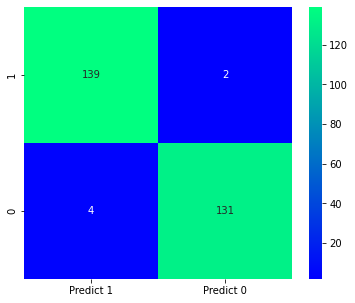

In [228]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True,fmt='g',cmap='winter')

In [229]:
metrics.accuracy_score(y_test,predictions)

0.9533333333333334

In [230]:
metrics.recall_score(y_test,predictions,average='micro')

0.9533333333333334

In [231]:
metrics.precision_score(y_test,predictions,average='micro')

0.9533333333333334

In [232]:
df['price_range'].value_counts()

1.0    500
2.0    500
3.0    500
0.0    500
Name: price_range, dtype: int64

### precision=TP/TP+FP.    recall=TP/TP+FN.
### if precision=recall only when FP=FN.
### This means that our algorithm  ability to correctly classify positive samples is same as its ability to correctly 
### classify negative samples.